# Importation des packages

In [1]:
#Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Question N°1

### Chargement de données salary_Data

In [13]:
# Chargement de données Salary
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Préparation de données

In [4]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [14]:
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Axes: >

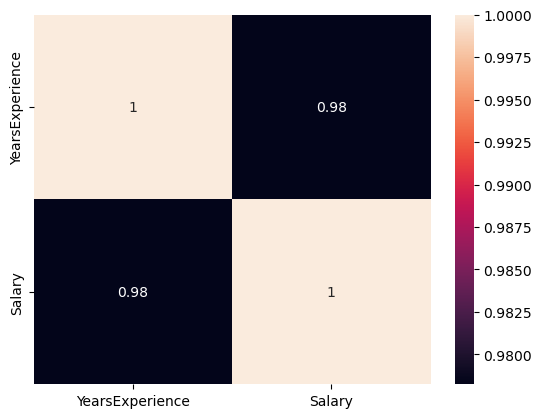

In [15]:
sns.heatmap(data.corr(), annot= True)

### Sépartion des données

In [16]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

### Application de la regression linéaire

In [19]:
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [20]:
y_test

11     55794.0
29    121872.0
23    113812.0
25    105582.0
18     81363.0
10     63218.0
Name: Salary, dtype: float64

In [21]:
y_pl = ml.predict(X_test)
y_pl

array([ 63822.10276786, 125176.91866803, 103466.75304182, 111018.11499876,
        81756.5874156 ,  62878.18252324])

### Evalution du modèle

In [22]:
mean_squared_error(y_test, y_pl)

35369798.22173562

In [24]:
print ("Mean Squared Error: ", mean_squared_error(y_test, y_pl))
print ("R2 Squared : ", r2_score(y_test, y_pl))

Mean Squared Error:  35369798.22173562
R2 Squared :  0.9439628569611375


### Affichage de la ligne de regression linéaire

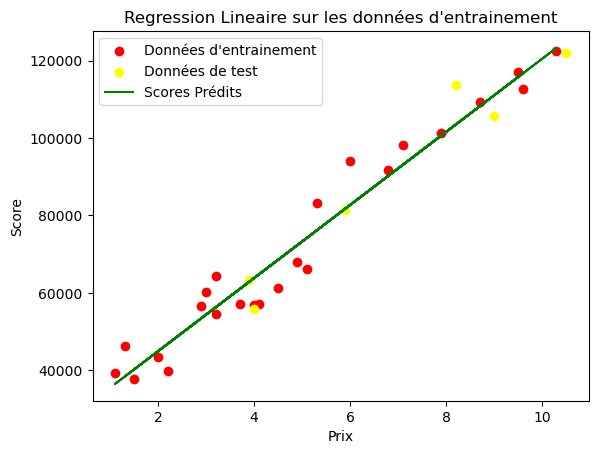

In [23]:
plt.scatter(X_train, y_train, color = 'red', label = "Données d'entrainement") #Données d'entrainement
plt.scatter(X_test, y_test, color = 'yellow', label = "Données de test")
plt.plot (X_train,ml.predict(X_train), color='green', label = "Scores Prédits")
plt.xlabel("Prix")
plt.ylabel ("Score")
plt.title ("Regression Lineaire sur les données d'entrainement")
plt.legend ()
plt.show()

# Question N°3

### Chargement de données Real-estate

In [26]:
# Chargement de données Real_estate
data = pd.read_csv('Real-estate.csv')
data.head()

,No,X1 date de transaction,X2 age de la maison,X3 distance jusqu'a la gare la plus proche,X4 nombre de supermarket de proximite,X5 latitude,X6 longitude,Y prix de la maison par unite de surface
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Vérification de données

In [28]:
data.columns
data.info()
data.shape
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   No                                          414 non-null    int64  
 1   X1 date de transaction                      414 non-null    float64
 2   X2 age de la maison                         414 non-null    float64
 3   X3 distance jusqu'a la gare la plus proche  414 non-null    float64
 4   X4 nombre de supermarket de proximite       414 non-null    int64  
 5   X5 latitude                                 414 non-null    float64
 6   X6 longitude                                414 non-null    float64
 7   Y prix de la maison par unite de surface    414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


No                                            0
X1 date de transaction                        0
X2 age de la maison                           0
X3 distance jusqu'a la gare la plus proche    0
X4 nombre de supermarket de proximite         0
X5 latitude                                   0
X6 longitude                                  0
Y prix de la maison par unite de surface      0
dtype: int64

<Axes: >

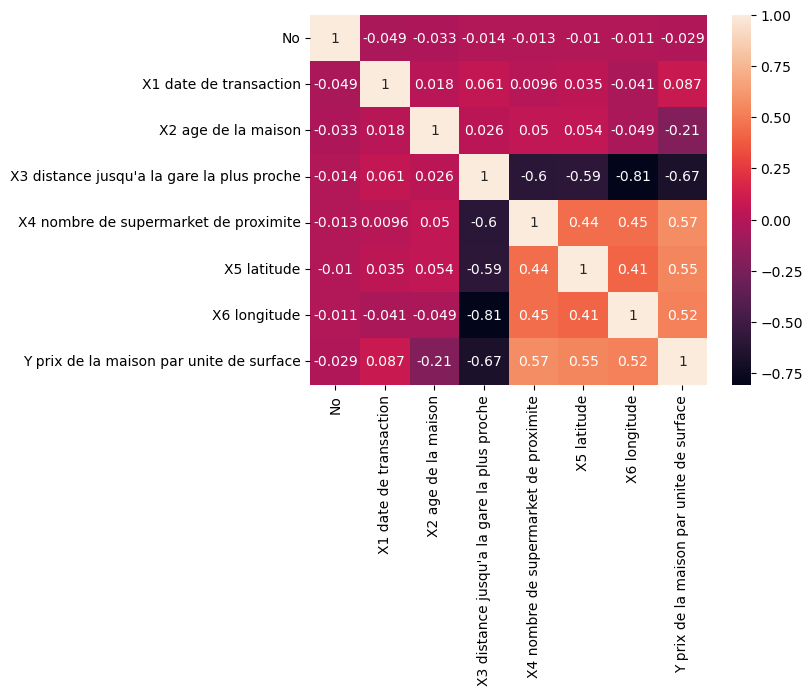

In [29]:
sns.heatmap(data.corr(), annot= True)

##### Application de la regression multiple

###### Séparation des données

In [34]:
X = data.iloc[:, :-1]
y = data.iloc[: , -1]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

###### Entrainnement du modèle

In [39]:
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [37]:
y_test


336    35.6
140    51.4
52     27.0
75     29.5
157    35.6
       ... 
60     21.3
248    22.3
329    19.2
123    45.5
317    37.5
Name: Y prix de la maison par unite de surface, Length: 83, dtype: float64

###### Prédictionn

In [40]:
y_pl = ml.predict(X_test)
y_pl

array([37.94588235, 46.84105144, 35.75007504, 32.79594943, 42.82861507,
       44.48055438, 52.82718833, 48.26553242, 35.29402613, 36.9810308 ,
       40.79148169, 34.0794296 , 42.62254758, 38.49236427, 54.79335797,
       38.47762453, 43.60049252, 41.26490193, 51.09475415, 50.6368343 ,
       40.82076064, 15.77651144, 43.83390685, 47.82087977, 48.52976465,
       42.7260463 , 40.48000445, 36.95019389, 19.19904373, 43.36756085,
       47.24988204, 34.51405951, 36.06592188, 55.0653277 , 36.75163872,
       12.99522787, 44.4036653 , 45.75945932, 36.76523791, 41.79746987,
       36.41643832, 36.3204185 , 34.6609248 , 44.42759795, 48.14701613,
       40.35013798, 30.77606141, 39.64948775, 40.32041203, 39.08557727,
       12.03853125, 42.2688639 , 41.8500757 , 11.8226938 , 10.16403782,
       40.44490315, 37.83242716, 36.57420341, 39.67626976, 31.83039249,
       43.15928194, 24.51006658, 54.26797924, 31.35273753, 30.97784833,
       28.64993129, 38.74802544, 46.13819367, 39.3989792 , 40.13

###### Evaluation du modèle

In [41]:
mean_squared_error(y_test, y_pl)

58.63382109599386

In [42]:
print ("Mean Squared Error: ", mean_squared_error(y_test, y_pl))
print ("R2 Squared : ", r2_score(y_test, y_pl))

Mean Squared Error:  58.63382109599386
R2 Squared :  0.5827626875020874


# Question N°2

### Chargement de données USA_Housing

In [74]:
# Chargement de données USA_Housing
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Application de la regression multiple

In [49]:
data.shape
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [75]:
data.drop(['Address'], axis = 1, inplace=True)

<Axes: >

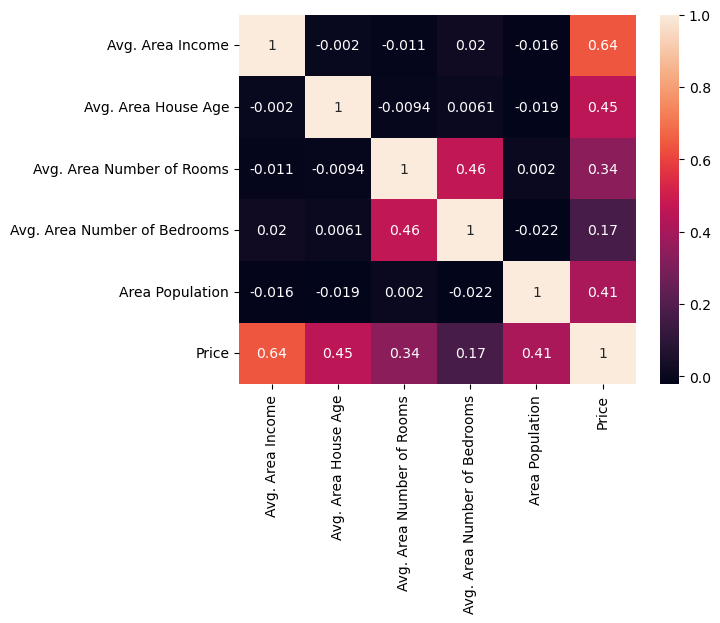

In [76]:
sns.heatmap(data.corr(), annot= True)

In [77]:
X = data.iloc[:500, :-1]
y = data.iloc[:500, -1]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

247    1.280910e+06
390    1.166673e+06
186    8.891132e+05
484    1.012322e+06
139    1.721739e+06
           ...     
486    1.869313e+06
189    1.400105e+06
495    1.084945e+06
206    1.405933e+06
355    2.249123e+06
Name: Price, Length: 400, dtype: float64

In [64]:
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pl = ml.predict(X_test)
mean_squared_error(y_test, y_pl)
print ("Mean Squared Error: ", mean_squared_error(y_test, y_pl))
print ("R2 Squared : ", r2_score(y_test, y_pl))

Mean Squared Error:  10125822052.707884
R2 Squared :  0.9322847284730489


#### Regression Simple

In [66]:
data = data[['Avg. Area Income', 'Price']]
data.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


<Axes: >

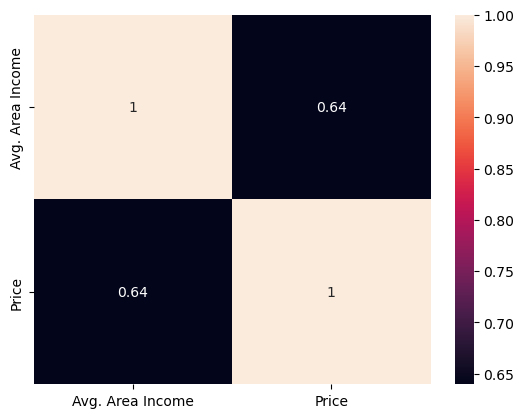

In [71]:
sns.heatmap(data.corr(), annot= True)

In [67]:
X = data.iloc[:500, :-1]
y = data.iloc[:500, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [68]:
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pl = ml.predict(X_test)

In [70]:
mean_squared_error(y_test, y_pl)
print ("Mean Squared Error: ", mean_squared_error(y_test, y_pl))
print ("R2 Squared : ", r2_score(y_test, y_pl))

Mean Squared Error:  88003254349.42984
R2 Squared :  0.4114883480563084


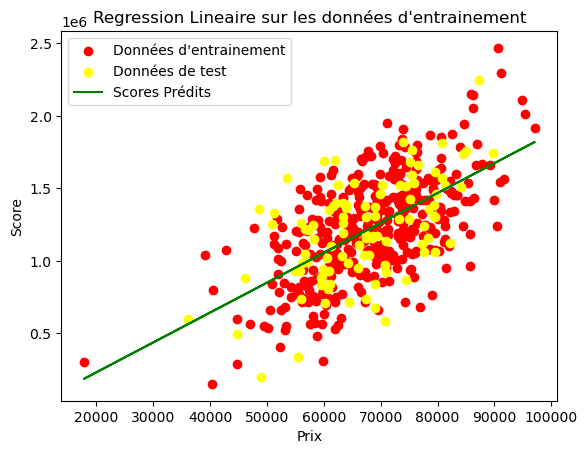

In [58]:
plt.scatter(X_train, y_train, color = 'red', label = "Données d'entrainement") #Données d'entrainement
plt.scatter(X_test, y_test, color = 'yellow', label = "Données de test")
plt.plot (X_train,ml.predict(X_train), color='green', label = "Scores Prédits")
plt.xlabel("Prix")
plt.ylabel ("Score")
plt.title ("Regression Lineaire sur les données d'entrainement")
plt.legend ()
plt.show()